# Using the Accelerated Orthogonal Least-Squares algorithm for building Polynomial NARX models

Example created by Wilson Rocha Lacerda Junior

In [1]:
import pandas as pd
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.basis_function._basis_function import Polynomial
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import (
    compute_residues_autocorrelation,
    compute_cross_correlation,
)
from sysidentpy.model_structure_selection import AOLS

# generating simulated data
x_train, x_test, y_train, y_test = get_siso_data(
    n=1000, colored_noise=False, sigma=0.001, train_percentage=90
)

In [2]:
basis_function = Polynomial(degree=2)
model = AOLS(xlag=3, ylag=3, k=5, L=1, basis_function=basis_function)

model.fit(X=x_train, y=y_train)

c:\Users\wilso\Desktop\projects\GitHub\sysidentpy\sysidentpy\utils\deprecation.py:37: FutureWarning: Passing a string to define the estimator will rise an error in v0.4.0. 
 You'll have to use AOLS(estimator=LeastSquares()) instead. 
 The only change is that you'll have to define the estimator first instead of passing a string like 'least_squares'. 
 This change will make easier to implement new estimators and it'll improve code readability.
  warnings.warn(message, FutureWarning)


In [3]:
yhat = model.predict(X=x_test, y=y_test)
rrse = root_relative_squared_error(y_test, yhat)
print(rrse)
results = pd.DataFrame(
    results(
        model.final_model,
        model.theta,
        model.err,
        model.n_terms,
        err_precision=8,
        dtype="sci",
    ),
    columns=["Regressors", "Parameters", "ERR"],
)
print(results)

0.002246729829172727
      Regressors   Parameters             ERR
0         y(k-1)   2.0014E-01  0.00000000E+00
1         y(k-2)  -1.4763E-04  0.00000000E+00
2        x1(k-2)   9.0004E-01  0.00000000E+00
3  x1(k-1)y(k-1)   9.9921E-02  0.00000000E+00
4       y(k-2)^2   1.1732E-04  0.00000000E+00


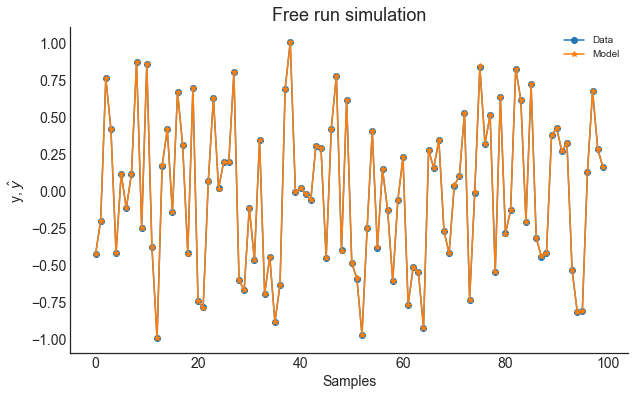

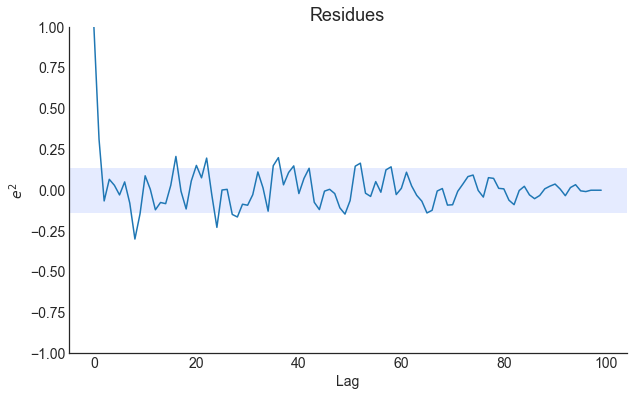

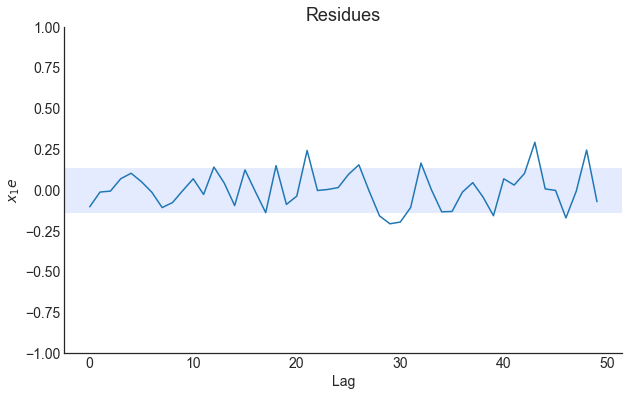

In [4]:
plot_results(y=y_test, yhat=yhat, n=1000)
ee = compute_residues_autocorrelation(y_test, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(y_test, yhat, x_test)
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")